In [1]:
from quilt.data.MarcelColvin import photos
import pandas as pd
import shapely.geometry as geom
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [2]:
pics = gpd.read_file("Picture_coords/pic_coords.shp")
fields = gpd.read_file("fields_corrected/fields_corrected.shp")

In [3]:
for i in range(0,len(fields)):
    if(fields['crop_list'][i] == None):
        fields['crop_list'][i] = 'UNKNOWN'

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
field1 = pics["geometry"][0]

In [5]:
def container(x):
    """This function applies the contain function which 
    determins if the coordinates of crop field are in a photo
    """
    return(field1.intersects(x))
nvdicrops = fields[fields['geometry'].apply(container)]

In [6]:
nvdicrops['coords'] = nvdicrops['geometry'].apply(lambda x: x.representative_point().coords[:])
nvdicrops['coords'] = [coords[0] for coords in nvdicrops['coords']]

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
colors = ['xkcd:purple','xkcd:green','xkcd:blue','xkcd:pink','xkcd:brown','xkcd:red',
          'xkcd:light blue','xkcd:teal','xkcd:orange','xkcd:light green','xkcd:magenta',
          'xkcd:yellow','xkcd:sky blue','xkcd:grey','xkcd:lime green','xkcd:olive']

In [8]:
crops = nvdicrops['crop_list'].unique()

In [10]:
fields

,OBJECTID,county_num,pk_site_id,site_id,pk_permit_,permit_num,permittee,permit_yr,p_eff_date,p_exp_date,...,loc_narr,is_active,size,size_units,crop_list,calc_acres,mtrs,hq_distric,site_distr,geometry
0,2771691,57,6129265,A14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT RD,1,15.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",8.920299,M07N04E28,57,None,POLYGON ((-121.5435143790129 38.43134714591933...
1,3617440,57,6129266,B10,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON BLVD,1,90.00,ACRES,ALFALFA,92.088548,M07N03E24,57,57,POLYGON ((-121.5829806146166 38.43535362263977...
2,2772757,57,6129267,B11,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON X WILLOWPOINT,1,75.00,ACRES,ALFALFA,77.539027,M07N03E24,57,57,POLYGON ((-121.5897884711797 38.43475678825893...
3,2770898,57,6129268,B12,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT @ DEEP WATER CHANNEL,1,75.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",60.747020,M07N03E24,57,57,POLYGON ((-121.5948226102154 38.44296931203907...
4,2770899,57,6129269,B13,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT X Z-LINE,1,64.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",63.385837,M07N03E24,57,57,"POLYGON ((-121.5933455142271 38.4409508416019,..."
5,2771489,57,6129270,B14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,FIELD NORTH OF B15,1,54.00,ACRES,ALFALFA,54.034062,M07N03E24,57,57,POLYGON ((-121.5918825640575 38.43821315794216...
6,2770078,57,6129271,B15,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT ROAD,1,43.00,ACRES,ALFALFA,46.672966,M07N03E24,57,57,POLYGON ((-121.5881540782541 38.43167761245395...
7,2771692,57,6129272,B16,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,LAMB,1,40.00,ACRES,ALFALFA,44.585527,M07N03E25,57,57,POLYGON ((-121.5919948516327 38.42925025223892...
8,2770079,57,6129273,B17,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,Z-LINE ROAD,1,56.00,ACRES,ALFALFA,59.400268,M07N03E25,57,57,POLYGON ((-121.5977750579594 38.42562607534814...
9,2770462,57,6129274,B3,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,1/4 MILE WEST OF JEFFERSON @ DEEP WATER CHANNEL,1,30.00,ACRES,ALFALFA,28.628593,M07N03E13,57,57,POLYGON ((-121.5874748341517 38.45818404892704...


Text(23.5,0.5,'Longitude')

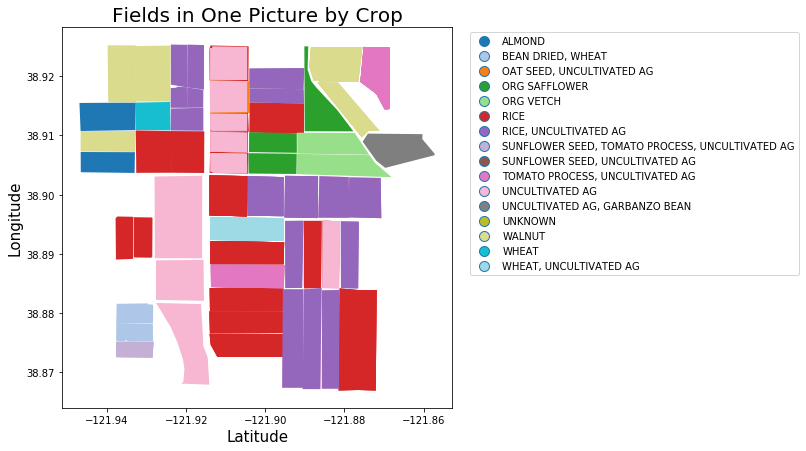

In [10]:
import matplotlib.axis
fig, ax = plt.subplots(1, figsize=(7,7))
#plt.imshow(plt.imread("D:/smaller_photos/m_3812101_se_10_h_20160711.tif"), extent=(pics.iloc[0]["west"], pics.iloc[0]["east"], pics.iloc[0]["south"], pics.iloc[0]["north"]))
nvdicrops.plot(ax = ax,column = 'crop_list',cmap = 'tab20', legend = True)
l=ax.get_legend()
l.set_bbox_to_anchor((1, 1, .9, 0))
#plt.plot(point_x, point_y, marker='o', markersize=3, color="red")
ax.set_title("Fields in One Picture by Crop", fontsize = 20)
ax.set_xlabel("Latitude", fontsize = 15)
ax.set_ylabel("Longitude", fontsize = 15)

Text(14.5,0.5,'Longitude')

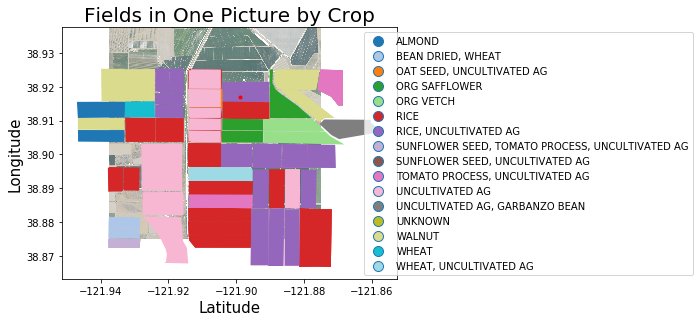

In [168]:
import matplotlib.axis
fig, ax = plt.subplots(1, figsize=(6,9))
plt.imshow(plt.imread("D:/smaller_photos/m_3812101_se_10_h_20160711.tif"), extent=(pics.iloc[0]["west"], pics.iloc[0]["east"], pics.iloc[0]["south"], pics.iloc[0]["north"]))
nvdicrops.plot(ax = ax,column = 'crop_list',cmap = 'tab20', legend = True)
l=ax.get_legend()
l.set_bbox_to_anchor((1, 1, .9, 0))
plt.plot(point_x, point_y, marker='o', markersize=3, color="red")
ax.set_title("Fields in One Picture by Crop", fontsize = 20)
ax.set_xlabel("Latitude", fontsize = 15)
ax.set_ylabel("Longitude", fontsize = 15)

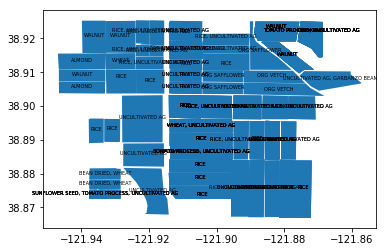

In [11]:
nvdicrops.plot()
for idx,row in nvdicrops.iterrows():
    plt.annotate(s=row['crop_list'],xy = row['coords'],
                 horizontalalignment='center',fontsize = 5)


In [93]:
from osgeo import gdal
from quilt.data.MarcelColvin import photos

In [35]:
ds = gdal.Open(photos.m_3812101_se_10_h_20160711_tif())

In [40]:
a= ds.ReadAsArray()

In [59]:
y = a.shape[1]
x = a.shape[2]

In [99]:
lat_thing = abs(pics.iloc[0]["west"]- pics.iloc[0]["east"])/a.shape[2]
lat_thing

1.2899896800825593e-05

In [101]:
long_thing = abs(pics.iloc[0]["south"]- pics.iloc[0]["north"])/a.shape[1]
long_thing

1.026272577996716e-05

In [122]:
import numpy as np
x_points = np.ndarray(shape = ( a.shape[2],1))
y_points = np.ndarray(shape = (a.shape[1], 1))
#i*lat_thing + pics.iloc[0]["west"]
#point_y = -2000*long_thing + pics.iloc[0]["north"]

In [123]:
for i in range(0, a.shape[2]):
    x_points[i] = i*lat_thing + pics.iloc[0]["west"]
for i in range(0, a.shape[1]):
    y_points[i] = -i*long_thing + pics.iloc[0]["north"]
    

In [ ]:
def pixel_to_coord(pic_num,x_pix, y_pix):
    lat_thing = abs(pics.iloc[pic_num]["west"]- pics.iloc[pic_num]["east"])/a.shape[2]
    long_thing = abs(pics.iloc[pic_num]["south"]- pics.iloc[pic_num]["north"])/a.shape[1]
    point_x = x_pix*lat_thing + pics.iloc[pic_num]["west"]
    point_y = -y_pix*long_thing + pics.iloc[pic_num]["north"]
    return point_x, point_y

In [124]:
x_points

array([[-121.9375   ],
       [-121.9374871],
       [-121.9374742],
       ..., 
       [-121.8750387],
       [-121.8750258],
       [-121.8750129]])

In [125]:
y_points

array([[ 38.9375    ],
       [ 38.93748974],
       [ 38.93747947],
       ..., 
       [ 38.87503079],
       [ 38.87502053],
       [ 38.87501026]])

In [127]:
(float(x_points[1000]),float(y_points[2000]))

(-121.92460010319917, 38.916974548440066)

In [142]:
counties = gpd.read_file("cb_2016_us_county_500k/cb_2016_us_county_500k.shp")
cali = counties[counties.STATEFP == "06"]
keep = ["Yolo", "Lake", "Colusa", "Sutter", "Sacramento", "Solano", "Napa"]
yolo = cali[cali.NAME.isin(keep)]


Text(44.3617,0.5,'Longitude')

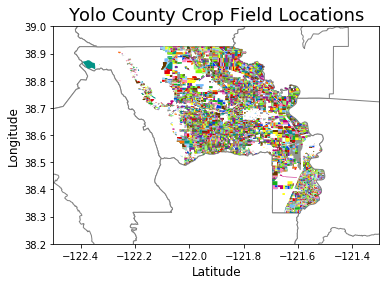

In [151]:
ax = yolo.plot(color = "white", edgecolor = "gray")
fields.plot(ax= ax,color = colors)
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Yolo County Crop Field Locations", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [169]:
fields = gpd.read_file("Crops_2016/2016_Crops.shp")
pics.crs = {"init":"epsg:4326"}
pics = pics.to_crs("+proj=aea +lat_1=34 +lat_2=40.5 +lat_0=0 +lon_0=-120 +x_0=0 +y_0=-4000000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")


In [171]:
fields

,OBJECTID,county_num,pk_site_id,site_id,pk_permit_,permit_num,permittee,permit_yr,p_eff_date,p_exp_date,...,loc_narr,is_active,size,size_units,crop_list,calc_acres,mtrs,hq_distric,site_distr,geometry
0,2771691,57,6129265,A14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT RD,1,15.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",8.920299,M07N04E28,57,None,POLYGON ((-134576.5216000006 47226.76740000024...
1,3617440,57,6129266,B10,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON BLVD,1,90.00,ACRES,ALFALFA,92.088548,M07N03E24,57,57,POLYGON ((-138009.7673000004 47728.80819999985...
2,2772757,57,6129267,B11,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON X WILLOWPOINT,1,75.00,ACRES,ALFALFA,77.539027,M07N03E24,57,57,POLYGON ((-138604.3568999991 47672.40379999951...
3,2770898,57,6129268,B12,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT @ DEEP WATER CHANNEL,1,75.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",60.747020,M07N03E24,57,57,POLYGON ((-139027.8567999993 48592.56189999916...
4,2770899,57,6129269,B13,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT X Z-LINE,1,64.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",63.385837,M07N03E24,57,57,POLYGON ((-138902.8745000008 48366.05260000005...
5,2771489,57,6129270,B14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,FIELD NORTH OF B15,1,54.00,ACRES,ALFALFA,54.034062,M07N03E24,57,57,POLYGON ((-138780.4605999999 48059.62829999998...
6,2770078,57,6129271,B15,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT ROAD,1,43.00,ACRES,ALFALFA,46.672966,M07N03E24,57,57,POLYGON ((-138467.6105000004 47327.77769999951...
7,2771692,57,6129272,B16,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,LAMB,1,40.00,ACRES,ALFALFA,44.585527,M07N03E25,57,57,POLYGON ((-138806.9781999998 47063.60270000063...
8,2770079,57,6129273,B17,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,Z-LINE ROAD,1,56.00,ACRES,ALFALFA,59.400268,M07N03E25,57,57,POLYGON ((-139317.6993000004 46669.26840000041...
9,2770462,57,6129274,B3,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,1/4 MILE WEST OF JEFFERSON @ DEEP WATER CHANNEL,1,30.00,ACRES,ALFALFA,28.628593,M07N03E13,57,57,POLYGON ((-138359.0604999997 50272.86339999922...
